In [1]:
# 随机化梯度下降和随机化权重的库
import random
import torch

In [2]:
# 构造 数据集及其标签
def synthetic_data(w,b,num_examples):
    """生成 y = Xw + b + nosie"""
    x = torch.normal(0,1,(num_examples,len(w)))
    y = torch.matmul(x,w)+b
    y += torch.normal(0,0.01,y.shape)
    return x,y.reshape((-1,1))

In [3]:
true_w = torch.tensor([2,-3.4])
true_b = 4.2
features,labels = synthetic_data(true_w,true_b,1000)
features,labels

(tensor([[-0.3325,  1.6275],
         [ 1.5719, -0.7153],
         [ 1.0229,  0.8047],
         ...,
         [ 1.5460, -0.9916],
         [ 0.6402, -2.4576],
         [-0.2876, -1.1596]]),
 tensor([[-2.0248e+00],
         [ 9.7442e+00],
         [ 3.5203e+00],
         [ 3.1250e+00],
         [ 6.0788e+00],
         [ 9.9061e-01],
         [ 2.7299e+00],
         [-3.9686e+00],
         [ 1.4721e+01],
         [ 5.9876e+00],
         [-7.4273e-02],
         [ 1.1131e+01],
         [ 1.1034e+01],
         [ 2.6881e+00],
         [ 2.2369e+00],
         [ 6.5253e+00],
         [ 1.1706e+00],
         [ 4.9509e-01],
         [ 2.8557e+00],
         [ 9.1212e+00],
         [ 6.3858e+00],
         [ 3.1799e+00],
         [ 6.2325e+00],
         [-1.5915e+00],
         [ 2.8220e+00],
         [ 8.6168e+00],
         [ 2.8148e+00],
         [ 6.3784e+00],
         [ 1.9290e+00],
         [ 5.4474e+00],
         [-8.4122e-01],
         [ 5.3513e+00],
         [ 5.5875e+00],
         [-3.1679e

scatter：散点图 
plt.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, edgecolors=None, plotnonfinite=False, *, data=None, **kwargs)  
x 和 y：必选参数，用于指定数据的横轴和纵轴坐标。它们可以是列表、NumPy 数组、Pandas 序列，或 PyTorch 张量等  
s：点的大小。可以是一个标量，表示所有点的大小相同；也可以是一个序列，表示每个点的大小。默认值为 20。  
c：点的颜色。可以是颜色字符串（如 'r' 表示红色），RGB 或 RGBA 元组（如 (0.1, 0.2, 0.5, 0.7)），或者是一个序列，用于为每个点指定不同的颜色。  
marker：标记的形状，用于指定点的形状。

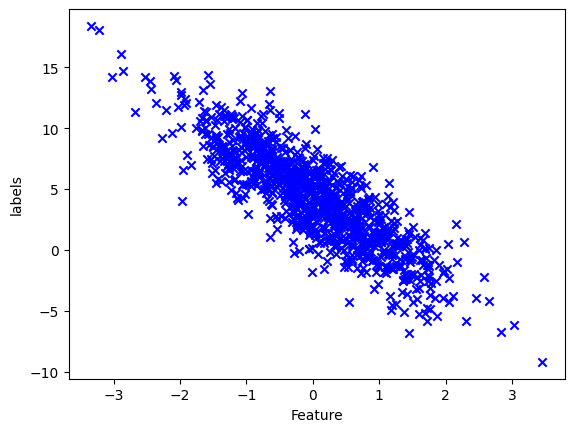

In [4]:
import matplotlib.pyplot as plt

# plt.scatter(features[:,1].numpy(),labels.numpy(),c='blue',marker='x')
plt.scatter(features[:,1],labels,c='blue',marker='x')

plt.xlabel('Feature')
plt.ylabel('labels')

plt.show()

random.shuffle(indices) 是 Python 中 random 模块提供的一个函数，用于随机打乱一个列表中的元素顺序。这个函数会直接在原列表上进行修改，而不是返回一个新的列表

In [5]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 随机读取序号
    random.shuffle(indices)
    for i in range(0 , num_examples,batch_size):
        batch_indices = torch.tensor(indices[i:min(i + batch_size,num_examples)])
        
        yield features[batch_indices],labels[batch_indices]

In [6]:
batch_size = 10

for X ,y in data_iter(batch_size,features,labels):
    print(X,'\n',y)
    break

tensor([[ 0.6410,  0.6445],
        [-0.0228,  1.0214],
        [ 0.2437,  1.7279],
        [-0.0971, -1.7559],
        [ 0.1035,  0.7000],
        [-0.8018,  1.4196],
        [-0.5836, -0.6241],
        [ 0.6176,  1.6026],
        [ 0.0058, -1.0029],
        [ 0.0937,  0.2857]]) 
 tensor([[ 3.2801],
        [ 0.6919],
        [-1.1912],
        [ 9.9770],
        [ 2.0153],
        [-2.2349],
        [ 5.1575],
        [-0.0100],
        [ 7.6335],
        [ 3.4192]])


In [7]:
# 定义初始化模型参数
w = torch.normal(0,0.01,size=(2,1),requires_grad = True)
b = torch.zeros(1,requires_grad = True)
print(w,b)

tensor([[-0.0017],
        [ 0.0095]], requires_grad=True) tensor([0.], requires_grad=True)


In [8]:
def linreg(X,w,b):
    """线性回归模型"""
    return torch.matmul(X,w)+b

In [9]:
def squared_loss(y_hat,y):
    """均方误差"""
    return (y_hat - y.reshape(y_hat.shape))**2/2

In [10]:
def sgd(params,lr,batch_size):
    """
    小批量随机梯度下降
    参数:
    params: 可迭代对象，包含需要更新的模型参数。
    lr: 学习率,是一个控制步长的超参数，用于调整每次更新时参数移动的幅度。
    batch_size: 小批量的大小。
    
    每次更新参数时，根据梯度和学习率调整参数值，然后将梯度清零
    """
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad/batch_size
            param.grad.zero_()

In [11]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss
batch_size = 10

for epoch in range(num_epochs):
    for X,y in data_iter(batch_size,features,labels):
        l = loss(net(X,w,b),y)
        l.sum().backward()
        sgd([w,b],lr,batch_size)
        # print(w,b)
    with torch.no_grad():
        train = loss(net(features,w,b),labels)
        print(f'epoch {epoch + 1}, loss {float(train.mean()):f}')

epoch 1, loss 0.039995
epoch 2, loss 0.000182
epoch 3, loss 0.000056


In [13]:
print(f'w的误差：{true_w - w.reshape(true_w.shape)}')
print(f'b的误差：{true_b - b}')

w的误差：tensor([-0.0010,  0.0005], grad_fn=<SubBackward0>)
b的误差：tensor([0.0005], grad_fn=<RsubBackward1>)
